<a href="https://colab.research.google.com/github/FAYASISMAEL/AI-ML-Visualization-Files/blob/main/BestAccuracyDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Find Best Model Based on Accuracy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# importing files
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Load Dataset

In [2]:
data = pd.read_csv('/content/heart_v2.csv')

In [3]:
data

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


Split features and datas

In [4]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [5]:
X
type(X)

pandas.core.frame.DataFrame

In [6]:
y

,heart disease
0,1
1,0
2,1
3,0
4,0
...,...
265,0
266,0
267,0
268,0


Scale features

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(270, 4)

In [8]:
type(X_scaled)

numpy.ndarray

Train-test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

Initialize models

In [10]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB()
}

In [11]:
type(models)

dict

Train models and calculate accuracy

In [12]:
accuracy_results_test = {}

for name, model in models.items():
    print(name,':', model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_results_test[name] = accuracy_score(y_test, y_pred)

Decision Tree : DecisionTreeClassifier()
Logistic Regression : LogisticRegression()
Naive Bayes : GaussianNB()


In [13]:
accuracy_results_train = {}

for name, model in models.items():
    print(name,':', model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accuracy_results_train[name] = accuracy_score(y_train, y_pred)

Decision Tree : DecisionTreeClassifier()
Logistic Regression : LogisticRegression()
Naive Bayes : GaussianNB()


Create accuracy table

In [14]:
accuracy_table_test = pd.DataFrame.from_dict(
    accuracy_results_test, orient="index", columns=["Accuracy"]
)

In [15]:
accuracy_table_train = pd.DataFrame.from_dict(
    accuracy_results_train, orient="index", columns=["Accuracy"]
)

In [16]:
accuracy_table_test

,Accuracy
Decision Tree,0.592593
Logistic Regression,0.685185
Naive Bayes,0.722222


In [17]:
accuracy_table_train

,Accuracy
Decision Tree,1.000000
Logistic Regression,0.662037
Naive Bayes,0.694444


Find best model

In [21]:
best_model = accuracy_table_test["Accuracy"].idxmax()
best_accuracy = accuracy_table_test["Accuracy"].max()

print("Model Accuracy Table:")
print(accuracy_table_test)

print("\nBest Performing Model:")
print(f"{best_model} with Accuracy = {best_accuracy:.4f}")

Model Accuracy Table:
                     Accuracy
Decision Tree        0.592593
Logistic Regression  0.685185
Naive Bayes          0.722222

Best Performing Model:
Naive Bayes with Accuracy = 0.7222


In [22]:
best_model = accuracy_table_train["Accuracy"].idxmax()
best_accuracy = accuracy_table_train["Accuracy"].max()

print("Model Accuracy Table:")
print(accuracy_table_train)

print("\nBest Performing Model:")
print(f"{best_model} with Accuracy = {best_accuracy:.4f}")

Model Accuracy Table:
                     Accuracy
Decision Tree        1.000000
Logistic Regression  0.662037
Naive Bayes          0.694444

Best Performing Model:
Decision Tree with Accuracy = 1.0000


Train Decision Tree for visualization

In [19]:
dt_best = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

Plot Decision Tree

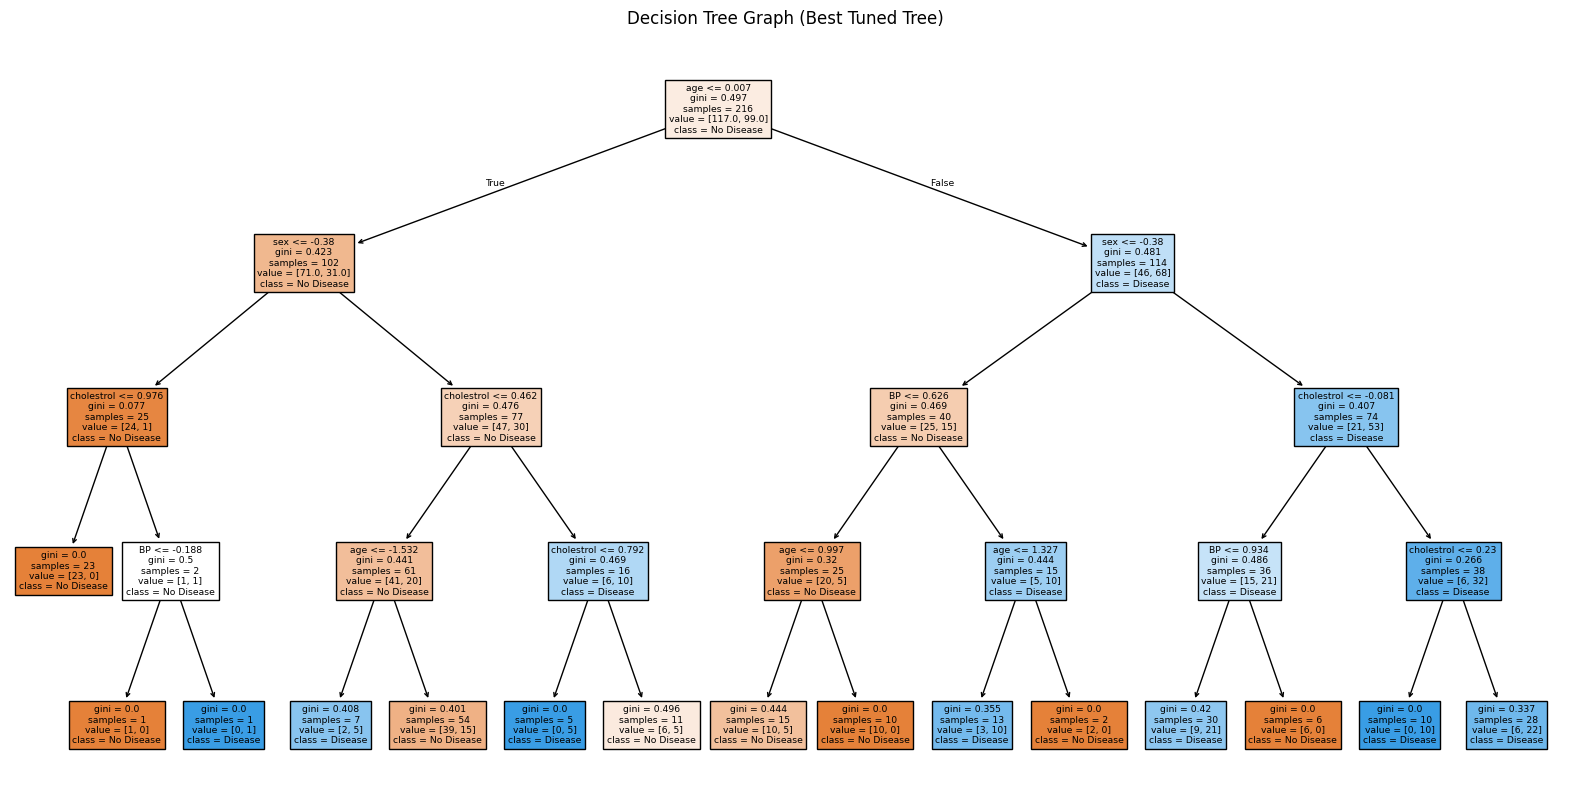

In [20]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt_best,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True
)
plt.title("Decision Tree Graph (Best Tuned Tree)")
plt.show()